In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
df=pd.read_csv('../datasets/bank_data.csv')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [9]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

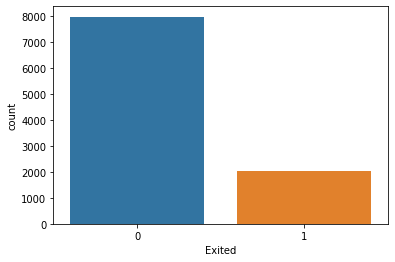

In [10]:
sns.countplot(x='Exited',data=df)

In [11]:
class_count_0,class_count_1=df.Exited.value_counts()

In [12]:
class_0=df[df.Exited==0]
class_1=df[df.Exited==1]

In [13]:
print("Class 0",class_0.shape)
print("Class 1",class_1.shape)

Class 0 (7963, 14)
Class 1 (2037, 14)


In [14]:
new_c1=class_1.sample(class_count_0,replace=True)
new_c1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6999,7000,15776156,Dolgorukova,521,France,Male,27,4,121325.84,1,1,1,164223.70,1
5269,5270,15732281,Ugoji,680,Germany,Male,34,6,146422.22,1,1,0,67142.97,1
1123,1124,15596800,Hill,779,Germany,Male,33,1,158456.76,1,1,1,197000.92,1
7058,7059,15671769,Zikoranachidimma,624,France,Female,71,4,170252.05,3,1,1,73679.59,1
936,937,15613630,Tang,775,France,Male,52,8,109922.61,1,1,1,96823.32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,1070,15628674,Iadanza,844,France,Male,40,7,113348.14,1,1,0,31904.31,1
1670,1671,15716994,Green,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
6159,6160,15627995,Angelo,756,Germany,Female,26,5,155143.52,1,0,1,135034.57,1
535,536,15776780,He,608,France,Male,59,1,0.00,1,1,0,70649.64,1


In [15]:
new_c1.Exited.value_counts()

1    7963
Name: Exited, dtype: int64

In [16]:
df=pd.concat([class_0, new_c1], ignore_index=True)

In [17]:
df.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

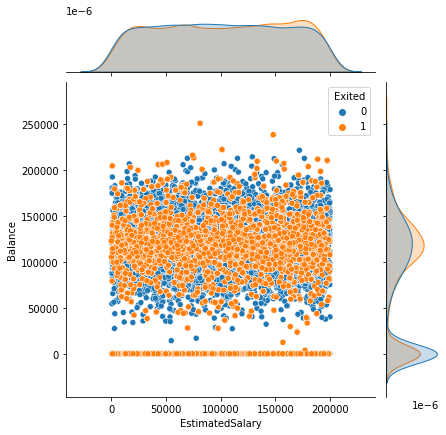

In [18]:
sns.jointplot(x='EstimatedSalary',y='Balance',data=df,hue='Exited')
plt.show()

In [19]:
X = df[['Balance','EstimatedSalary']]
y = df['Exited']

In [20]:
scaled = StandardScaler()
x = scaled.fit_transform(X)

In [21]:
xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=.2,random_state=0)

In [22]:
m2=SVC(kernel='linear')

In [18]:

m2.fit(xtrain,ytrain)

In [ ]:

ypredsvc=m2.predict(X)

In [ ]:

print("SVC\n",confusion_matrix(y,ypredsvc))